## <font color = 'yellow'><b>Job Data Analysis</b></font> 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('combined_data.csv')

In [3]:
df

,Job Title,Company Name,Experience Range,Salary,Location,Posted Date,Openings,Applicants,Job Description,Keywords
0,Salesforce Administrator,Lutron Gl Sales,5 - 8 years,Not Disclosed,Gurugram,7 days ago,1.0,367,Role & responsibilities\nDirect the daily work...,"Sfdc Development, Salesforce Qa, SFDC, Web Dev..."
1,Application Developer,Accenture,2 - 4 years,Not Disclosed,Noida,8 days ago,NaN,50,Project Role :Application Developer\n\n\nProje...,"salesforce platform, salesforce lightning, jav..."
2,Senior Officer,Max Life Insurance,1 - 5 years,Not Disclosed,Bhopal,Few Hours Ago,1.0,Less than 10,Max Life Insurance Company Limited is looking ...,"insurance, vendor management, visualforce, pro..."
3,Salesforce Administrator,Lutron Gl Sales,5 - 8 years,Not Disclosed,Gurugram,7 days ago,1.0,367,Role & responsibilities\nDirect the daily work...,"Sfdc Development, Salesforce Qa, SFDC, Web Dev..."
4,Application Developer,Accenture,2 - 4 years,Not Disclosed,Noida,8 days ago,NaN,50,Project Role :Application Developer\n\n\nProje...,"salesforce platform, salesforce lightning, jav..."
...,...,...,...,...,...,...,...,...,...,...
399,Tech Delivery Subject Matter Expert,Accenture,5 - 10 years,Not Disclosed,Gurugram,5 days ago,NaN,Less than 10,Project Role :Tech Delivery Subject Matter Exp...,"data analytics, data engineering, sql, process..."
400,Marketing Executive,Aarogya Hospital,5 - 9 years,Not Disclosed,New Delhi,4 days ago,1.0,46,Aarogya Hospital is looking for Marketing Exec...,"visualforce, branding, sfdc, business developm..."
401,PowerBI Developer,Rainsoft Global,2 - 4 years,Not Disclosed,Mumbai,5 days ago,1.0,840,We are seeking a skilled Business Intelligence...,"Power BI, BI, Data Analytics, Data Science, Or..."
402,SFCC Backend and Frontend Developer,Leuwint Technologies,4 - 9 years,Not Disclosed,Mumbai,6 days ago,NaN,59,Required Skills:\nHands-On Experience in devel...,"SFRA, Demandware Script, Salesforce Commerce C..."


In [4]:
df.describe()

,Openings
count,259.000000
mean,2.413127
std,3.707731
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,15.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Job Title         402 non-null    object 
 1   Company Name      402 non-null    object 
 2   Experience Range  402 non-null    object 
 3   Salary            402 non-null    object 
 4   Location          402 non-null    object 
 5   Posted Date       402 non-null    object 
 6   Openings          259 non-null    float64
 7   Applicants        402 non-null    object 
 8   Job Description   404 non-null    object 
 9   Keywords          404 non-null    object 
dtypes: float64(1), object(9)
memory usage: 31.7+ KB


In [6]:
df.Salary.value_counts()

Salary
Not Disclosed    402
Name: count, dtype: int64

In [7]:
df['Posted Date'].value_counts()

Posted Date
5 days ago       80
Just now         61
1 day ago        61
4 days ago       40
Few Hours Ago    39
3 days ago       38
7 days ago       21
8 days ago       21
13 days ago      21
6 days ago       20
Name: count, dtype: int64

---

# <font color = 'yellow'><b>Data Preprocessing</b></font>

In [8]:
df.dropna(subset=['Posted Date'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [9]:
df.shape

(402, 10)

In [10]:
df.iloc[[332, 141, 28, 238, 212, 85, 175, 111, 157, 47]]

,Job Title,Company Name,Experience Range,Salary,Location,Posted Date,Openings,Applicants,Job Description,Keywords
332,Business Function Implement Practitioner,Accenture,5 - 7 years,Not Disclosed,Gurugram,Just now,NaN,Less than 10,Project Role :Business Function Implement Prac...,"community cloud, salesforce sales cloud, desig..."
141,Salesforce Developer,Nityo Infotech,4 - 8 years,Not Disclosed,Kolkata,Few Hours Ago,1.0,41,SFDC Developer Work location - Gurugram Exper...,"Training, SFDC, Salesforce.com, HR, Management..."
28,Data & Analytics Intern,Answer Junction Llc,0 - 1 years,Not Disclosed,Mumbai,1 day ago,1.0,731,Position Overview: We are seeking a highly mot...,"Data Analytics, Data Science, deep learning, P..."
238,Data Scientist,Transformative Learning Solutions,3 - 5 years,Not Disclosed,Gurugram,3 days ago,1.0,765,About the Company\n\nThe Ayurveda Experience i...,"Data Science, superset, Power Bi, Tableau, Dat..."
212,MNC Opening - Manager Salesforce Division - Gu...,Advance Talent Services,3 - 8 years,Not Disclosed,Gurugram,4 days ago,5.0,230,Role & responsibilities\n\n\nRole 1:\nDesignat...,"Salesforce, Salesforce Sales Cloud, SFDC, Sale..."
85,PowerBI Developer,Rainsoft Global,2 - 4 years,Not Disclosed,Mumbai,5 days ago,1.0,840,We are seeking a skilled Business Intelligence...,"Power BI, BI, Data Analytics, Data Science, Or..."
175,SFCC Backend and Frontend Developer,Leuwint Technologies,4 - 9 years,Not Disclosed,Mumbai,6 days ago,NaN,59,Required Skills:\nHands-On Experience in devel...,"SFRA, Demandware Script, Salesforce Commerce C..."
111,Salesforce Administrator,Lutron Gl Sales,5 - 8 years,Not Disclosed,Gurugram,7 days ago,1.0,367,Role & responsibilities\nDirect the daily work...,"Sfdc Development, Salesforce Qa, SFDC, Web Dev..."
157,Application Developer,Accenture,2 - 4 years,Not Disclosed,Noida,8 days ago,NaN,50,Project Role :Application Developer\n\n\nProje...,"salesforce platform, salesforce lightning, jav..."
47,Software Development Engineer,Accenture,3 - 5 years,Not Disclosed,Gurugram,13 days ago,NaN,24,Project Role :Software Development Engineer\n\...,"salesforce platform, salesforce lightning, jav..."


In [11]:
list(df['Posted Date'].value_counts().index)

['5 days ago',
 'Just now',
 '1 day ago',
 '4 days ago',
 'Few Hours Ago',
 '3 days ago',
 '7 days ago',
 '8 days ago',
 '13 days ago',
 '6 days ago']

In [12]:
# Changing posted date to numeric

from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=[['Just now', 'Few Hours Ago', '1 day ago', '3 days ago', '4 days ago', '5 days ago', '6 days ago', '7 days ago', '8 days ago', '13 days ago']], encoded_missing_value=0)

In [13]:
df['Posted Days Ago'] = ordinal_encoder.fit_transform(df[['Posted Date']]).astype(int)
df.drop('Posted Date', axis=1, inplace=True)

In [14]:
df['Posted Days Ago'].replace(1, 0, inplace=True)
df['Posted Days Ago'].replace(2, 1, inplace=True)
df['Posted Days Ago'].replace(9, 13, inplace=True)

C:\Users\khans\AppData\Local\Temp\ipykernel_14676\397463828.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Posted Days Ago'].replace(1, 0, inplace=True)
C:\Users\khans\AppData\Local\Temp\ipykernel_14676\397463828.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

In [15]:
df.iloc[[332, 141, 28, 238, 212, 85, 175, 111, 157, 47]]

,Job Title,Company Name,Experience Range,Salary,Location,Openings,Applicants,Job Description,Keywords,Posted Days Ago
332,Business Function Implement Practitioner,Accenture,5 - 7 years,Not Disclosed,Gurugram,NaN,Less than 10,Project Role :Business Function Implement Prac...,"community cloud, salesforce sales cloud, desig...",0
141,Salesforce Developer,Nityo Infotech,4 - 8 years,Not Disclosed,Kolkata,1.0,41,SFDC Developer Work location - Gurugram Exper...,"Training, SFDC, Salesforce.com, HR, Management...",0
28,Data & Analytics Intern,Answer Junction Llc,0 - 1 years,Not Disclosed,Mumbai,1.0,731,Position Overview: We are seeking a highly mot...,"Data Analytics, Data Science, deep learning, P...",1
238,Data Scientist,Transformative Learning Solutions,3 - 5 years,Not Disclosed,Gurugram,1.0,765,About the Company\n\nThe Ayurveda Experience i...,"Data Science, superset, Power Bi, Tableau, Dat...",3
212,MNC Opening - Manager Salesforce Division - Gu...,Advance Talent Services,3 - 8 years,Not Disclosed,Gurugram,5.0,230,Role & responsibilities\n\n\nRole 1:\nDesignat...,"Salesforce, Salesforce Sales Cloud, SFDC, Sale...",4
85,PowerBI Developer,Rainsoft Global,2 - 4 years,Not Disclosed,Mumbai,1.0,840,We are seeking a skilled Business Intelligence...,"Power BI, BI, Data Analytics, Data Science, Or...",5
175,SFCC Backend and Frontend Developer,Leuwint Technologies,4 - 9 years,Not Disclosed,Mumbai,NaN,59,Required Skills:\nHands-On Experience in devel...,"SFRA, Demandware Script, Salesforce Commerce C...",6
111,Salesforce Administrator,Lutron Gl Sales,5 - 8 years,Not Disclosed,Gurugram,1.0,367,Role & responsibilities\nDirect the daily work...,"Sfdc Development, Salesforce Qa, SFDC, Web Dev...",7
157,Application Developer,Accenture,2 - 4 years,Not Disclosed,Noida,NaN,50,Project Role :Application Developer\n\n\nProje...,"salesforce platform, salesforce lightning, jav...",8
47,Software Development Engineer,Accenture,3 - 5 years,Not Disclosed,Gurugram,NaN,24,Project Role :Software Development Engineer\n\...,"salesforce platform, salesforce lightning, jav...",13


In [16]:
# Filling missing values of Openings with 1
df['Openings'].value_counts()

Openings
1.0     200
2.0      20
5.0      20
15.0     19
Name: count, dtype: int64

In [17]:
# Filling missing values of Openings with 1
df['Openings'].fillna(1, inplace=True)
df['Openings'] = df['Openings'].astype(int)

C:\Users\khans\AppData\Local\Temp\ipykernel_14676\1412904115.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Openings'].fillna(1, inplace=True)


In [18]:
df

,Job Title,Company Name,Experience Range,Salary,Location,Openings,Applicants,Job Description,Keywords,Posted Days Ago
0,Salesforce Administrator,Lutron Gl Sales,5 - 8 years,Not Disclosed,Gurugram,1,367,Role & responsibilities\nDirect the daily work...,"Sfdc Development, Salesforce Qa, SFDC, Web Dev...",7
1,Application Developer,Accenture,2 - 4 years,Not Disclosed,Noida,1,50,Project Role :Application Developer\n\n\nProje...,"salesforce platform, salesforce lightning, jav...",8
2,Senior Officer,Max Life Insurance,1 - 5 years,Not Disclosed,Bhopal,1,Less than 10,Max Life Insurance Company Limited is looking ...,"insurance, vendor management, visualforce, pro...",0
3,Salesforce Administrator,Lutron Gl Sales,5 - 8 years,Not Disclosed,Gurugram,1,367,Role & responsibilities\nDirect the daily work...,"Sfdc Development, Salesforce Qa, SFDC, Web Dev...",7
4,Application Developer,Accenture,2 - 4 years,Not Disclosed,Noida,1,50,Project Role :Application Developer\n\n\nProje...,"salesforce platform, salesforce lightning, jav...",8
...,...,...,...,...,...,...,...,...,...,...
397,Tech Delivery Subject Matter Expert,Accenture,5 - 10 years,Not Disclosed,Gurugram,1,Less than 10,Project Role :Tech Delivery Subject Matter Exp...,"data analytics, data engineering, sql, process...",5
398,Marketing Executive,Aarogya Hospital,5 - 9 years,Not Disclosed,New Delhi,1,46,Aarogya Hospital is looking for Marketing Exec...,"visualforce, branding, sfdc, business developm...",4
399,PowerBI Developer,Rainsoft Global,2 - 4 years,Not Disclosed,Mumbai,1,840,We are seeking a skilled Business Intelligence...,"Power BI, BI, Data Analytics, Data Science, Or...",5
400,SFCC Backend and Frontend Developer,Leuwint Technologies,4 - 9 years,Not Disclosed,Mumbai,1,59,Required Skills:\nHands-On Experience in devel...,"SFRA, Demandware Script, Salesforce Commerce C...",6


In [19]:
# Handling Applicants column
df['Applicants'].value_counts()

Applicants
Less than 10    101
367              21
24               21
50               21
46               20
59               20
840              20
58               19
210              16
2002             16
764              14
41               12
230              12
95               12
37                9
229               8
94                8
42                8
38                6
765               5
39                5
734               4
2003              4
732               4
211               3
727               2
731               2
728               2
733               1
730               1
737               1
738               1
739               1
209               1
729               1
Name: count, dtype: int64

In [20]:
df['Applicants'].replace('Less than 10', 10, inplace=True)
df['Applicants'] = df['Applicants'].astype(int)

C:\Users\khans\AppData\Local\Temp\ipykernel_14676\1734573916.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Applicants'].replace('Less than 10', 10, inplace=True)


In [21]:
df

,Job Title,Company Name,Experience Range,Salary,Location,Openings,Applicants,Job Description,Keywords,Posted Days Ago
0,Salesforce Administrator,Lutron Gl Sales,5 - 8 years,Not Disclosed,Gurugram,1,367,Role & responsibilities\nDirect the daily work...,"Sfdc Development, Salesforce Qa, SFDC, Web Dev...",7
1,Application Developer,Accenture,2 - 4 years,Not Disclosed,Noida,1,50,Project Role :Application Developer\n\n\nProje...,"salesforce platform, salesforce lightning, jav...",8
2,Senior Officer,Max Life Insurance,1 - 5 years,Not Disclosed,Bhopal,1,10,Max Life Insurance Company Limited is looking ...,"insurance, vendor management, visualforce, pro...",0
3,Salesforce Administrator,Lutron Gl Sales,5 - 8 years,Not Disclosed,Gurugram,1,367,Role & responsibilities\nDirect the daily work...,"Sfdc Development, Salesforce Qa, SFDC, Web Dev...",7
4,Application Developer,Accenture,2 - 4 years,Not Disclosed,Noida,1,50,Project Role :Application Developer\n\n\nProje...,"salesforce platform, salesforce lightning, jav...",8
...,...,...,...,...,...,...,...,...,...,...
397,Tech Delivery Subject Matter Expert,Accenture,5 - 10 years,Not Disclosed,Gurugram,1,10,Project Role :Tech Delivery Subject Matter Exp...,"data analytics, data engineering, sql, process...",5
398,Marketing Executive,Aarogya Hospital,5 - 9 years,Not Disclosed,New Delhi,1,46,Aarogya Hospital is looking for Marketing Exec...,"visualforce, branding, sfdc, business developm...",4
399,PowerBI Developer,Rainsoft Global,2 - 4 years,Not Disclosed,Mumbai,1,840,We are seeking a skilled Business Intelligence...,"Power BI, BI, Data Analytics, Data Science, Or...",5
400,SFCC Backend and Frontend Developer,Leuwint Technologies,4 - 9 years,Not Disclosed,Mumbai,1,59,Required Skills:\nHands-On Experience in devel...,"SFRA, Demandware Script, Salesforce Commerce C...",6


In [22]:
df['Experience Range'].value_counts()

Experience Range
2 - 4 years     41
3 - 5 years     40
5 - 7 years     40
3 - 8 years     40
5 - 9 years     40
5 - 10 years    39
5 - 8 years     21
2 - 6 years     21
1 - 5 years     20
0 - 1 years     20
4 - 8 years     20
7 - 9 years     20
4 - 9 years     20
3 - 6 years     20
Name: count, dtype: int64

In [23]:
df['Experience Range (yrs)'] = df['Experience Range'].str.extract(r'(\d+\s*-\s*\d+)')
df['Experience Range (yrs)'].fillna(0, inplace=True)
df.drop('Experience Range', axis=1, inplace=True)

C:\Users\khans\AppData\Local\Temp\ipykernel_14676\1158454119.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Experience Range (yrs)'].fillna(0, inplace=True)


In [24]:
df

,Job Title,Company Name,Salary,Location,Openings,Applicants,Job Description,Keywords,Posted Days Ago,Experience Range (yrs)
0,Salesforce Administrator,Lutron Gl Sales,Not Disclosed,Gurugram,1,367,Role & responsibilities\nDirect the daily work...,"Sfdc Development, Salesforce Qa, SFDC, Web Dev...",7,5 - 8
1,Application Developer,Accenture,Not Disclosed,Noida,1,50,Project Role :Application Developer\n\n\nProje...,"salesforce platform, salesforce lightning, jav...",8,2 - 4
2,Senior Officer,Max Life Insurance,Not Disclosed,Bhopal,1,10,Max Life Insurance Company Limited is looking ...,"insurance, vendor management, visualforce, pro...",0,1 - 5
3,Salesforce Administrator,Lutron Gl Sales,Not Disclosed,Gurugram,1,367,Role & responsibilities\nDirect the daily work...,"Sfdc Development, Salesforce Qa, SFDC, Web Dev...",7,5 - 8
4,Application Developer,Accenture,Not Disclosed,Noida,1,50,Project Role :Application Developer\n\n\nProje...,"salesforce platform, salesforce lightning, jav...",8,2 - 4
...,...,...,...,...,...,...,...,...,...,...
397,Tech Delivery Subject Matter Expert,Accenture,Not Disclosed,Gurugram,1,10,Project Role :Tech Delivery Subject Matter Exp...,"data analytics, data engineering, sql, process...",5,5 - 10
398,Marketing Executive,Aarogya Hospital,Not Disclosed,New Delhi,1,46,Aarogya Hospital is looking for Marketing Exec...,"visualforce, branding, sfdc, business developm...",4,5 - 9
399,PowerBI Developer,Rainsoft Global,Not Disclosed,Mumbai,1,840,We are seeking a skilled Business Intelligence...,"Power BI, BI, Data Analytics, Data Science, Or...",5,2 - 4
400,SFCC Backend and Frontend Developer,Leuwint Technologies,Not Disclosed,Mumbai,1,59,Required Skills:\nHands-On Experience in devel...,"SFRA, Demandware Script, Salesforce Commerce C...",6,4 - 9


In [25]:
df['Keywords'].value_counts()

Keywords
Sfdc Development, Salesforce Qa, SFDC, Web Development, Salesforce CRM, Drupal, Sfdc Testing, Salesforce                                                                                                                                                                          21
salesforce platform, salesforce lightning, javascript, salesforce integration, web development, visualforce, rest, css, software development, unit testing, sfdc, triggers, apex, sql, salesforce, salesforce crm, java, json, html, code review, agile                           21
python, data engineering, business intelligence, artificial intelligence, data science, data analysis, data analytics, natural language processing, predictive analytics, machine learning, sql, tableau, r, predictive modeling, statistical modeling                            21
salesforce platform, salesforce lightning, javascript, salesforce, web development, visualforce, css, web services, sfdc, triggers, application development, ape

In [26]:
df.loc[df['Job Title'] == 'Salesforce Administrator']['Keywords'].value_counts()

Keywords
Sfdc Development, Salesforce Qa, SFDC, Web Development, Salesforce CRM, Drupal, Sfdc Testing, Salesforce    21
Name: count, dtype: int64

In [27]:
df.loc[df['Job Title'] == 'Application Developer']['Keywords'].value_counts()

Keywords
salesforce platform, salesforce lightning, javascript, salesforce, web development, visualforce, css, web services, sfdc, triggers, application development, apex, sql, business requirement analysis, java, json, html, code review, agile    21
Name: count, dtype: int64

In [28]:
df['Job Description'].value_counts()

Job Description
Role & responsibilities\nDirect the daily work of the A3E Application Development Support Team which includes web hosting and Salesforce.com support\nOversee and perform content authoring, minor code changes, and configuration changes for web content management system, Drupal and Acquia\nOversee and build out dashboards in Google Looker Studio and Microsoft Azure\nOversee configuration changes in Salesforce.com such as user creation/update, permission changes, data updates, and troubleshoot log in issues.\nPerform project management activities for small projects using techniques from Kanban, Scrum, or waterfall models\nSet daily team priorities based on business and IT team requirements\nEnsure the quality of the work output of team assignments\nEvaluate and implement changes in work processes to maximize efficiency and quality of team's work\nPreferred candidate profile\n4 year degree in Computer Science, Computer Engineering, or equivalent\n5-8 years experience workin

In [29]:
# Removing \n and \n\n from job description with ,
df['Job Description'] = df['Job Description'].str.replace(r'\n+', ', ', regex=True)
df.sample(5)

,Job Title,Company Name,Salary,Location,Openings,Applicants,Job Description,Keywords,Posted Days Ago,Experience Range (yrs)
99,Sr. Test Engineer,Essenware,Not Disclosed,Kolkata,1,2002,3 to 6 years experience in Test Engineer role ...,"Training, Test case execution, Manual testing,...",5,3 - 6
272,Data & Analytics Intern,Answer Junction Llc,Not Disclosed,Mumbai,1,737,Position Overview: We are seeking a highly mot...,"Data Analytics, Data Science, deep learning, P...",1,0 - 1
360,Application Developer,Accenture,Not Disclosed,Noida,1,50,"Project Role :Application Developer, Project R...","salesforce platform, salesforce lightning, jav...",8,2 - 4
5,Software Development Engineer,Accenture,Not Disclosed,Gurugram,1,24,"Project Role :Software Development Engineer, P...","salesforce platform, salesforce lightning, jav...",13,3 - 5
249,Business Function Implement Practitioner,Accenture,Not Disclosed,Gurugram,1,10,Project Role :Business Function Implement Prac...,"community cloud, salesforce sales cloud, desig...",0,5 - 7


The above data has been scrapped from a job portal recently. Use this data to prepare a report the following:
1. Find the most sought after roles by freshers(0-2 years of exp)
2. Find the top five skills sought after in the market( irrespective of the experience level.)
3. Find the top 3 domains hiring for freshers.
4. Find the top locations(city/state) where the roles are located.
5. Find the top locations for jobs in India for freshers 
6. Find the top 3 skills difference among each role at different experience levels. 
7. Create a presentation and present it during time allocated to you.

In [30]:
# Top 5 job title in the market
df['Job Title'].value_counts().head(5)

Job Title
Salesforce Developer                                                40
Salesforce Administrator                                            21
Software Development Engineer                                       21
S&C Global Network - AI - Life Sciences -Data Science Consultant    21
Application Developer                                               21
Name: count, dtype: int64

<Axes: xlabel='Experience Range (yrs)'>

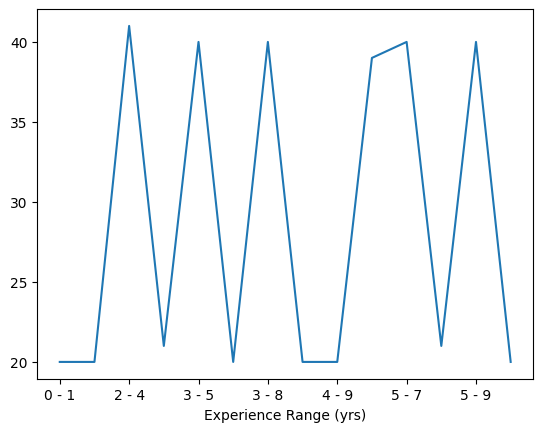

In [31]:
# line chart showing the distribution of required experience range
df['Experience Range (yrs)'].value_counts().sort_index().plot(kind='line')

## Ans 1:

In [32]:
# The most sought after roles by freshers (having experience of 0 - 2)
freshers = df.loc[df['Experience Range (yrs)'].str.contains(r'0|1|2', na=False)]
freshers['Job Title'].value_counts()

Job Title
Application Developer                                               21
S&C Global Network - AI - Life Sciences -Data Science Consultant    21
Senior Officer                                                      20
Data & Analytics Intern                                             20
Tech Delivery Subject Matter Expert                                 20
PowerBI Developer                                                   20
Job opening For Salesforce Implementation Specialist                19
Name: count, dtype: int64

## Ans 2:

In [33]:
df[df['Job Title'] == 'Data Scientist']['Keywords'].value_counts()

Keywords
Data Science, superset, Power Bi, Tableau, Data Analytics, Elt, ETL, data insights, SQL    19
Name: count, dtype: int64

In [34]:
# Top 5 skills sought after in the market
df['Keywords'].value_counts().head(5)

Keywords
Sfdc Development, Salesforce Qa, SFDC, Web Development, Salesforce CRM, Drupal, Sfdc Testing, Salesforce                                                                                                                                                   21
salesforce platform, salesforce lightning, javascript, salesforce integration, web development, visualforce, rest, css, software development, unit testing, sfdc, triggers, apex, sql, salesforce, salesforce crm, java, json, html, code review, agile    21
python, data engineering, business intelligence, artificial intelligence, data science, data analysis, data analytics, natural language processing, predictive analytics, machine learning, sql, tableau, r, predictive modeling, statistical modeling     21
salesforce platform, salesforce lightning, javascript, salesforce, web development, visualforce, css, web services, sfdc, triggers, application development, apex, sql, business requirement analysis, java, json, html, code review,

In [35]:
skills = dict()
for i in df['Keywords']:
    for j in i.split(', '):
        if j.lower() in skills:
            skills[j.lower()] += 1
        else:
            skills[j] = 1
            
skills = dict(sorted(skills.items(), key=lambda x: x[1], reverse=True))

skills = pd.Series(skills)
skills.head(5)

sfdc           241
salesforce     221
sql            182
apex           162
visualforce    142
dtype: int64

In [36]:
skills_df = pd.DataFrame(skills, columns=['Count'])
skills_df.head(5)

,Count
sfdc,241
salesforce,221
sql,182
apex,162
visualforce,142


In [37]:
new_df = df.groupby('Job Title')

In [38]:
df[df['Job Title'] == 'Salesforce Developer']['Experience Range (yrs)']

9      5 - 7
10     4 - 8
29     5 - 7
30     4 - 8
51     5 - 7
52     4 - 8
73     5 - 7
74     4 - 8
95     5 - 7
96     4 - 8
118    5 - 7
119    4 - 8
140    5 - 7
141    4 - 8
162    5 - 7
163    4 - 8
177    5 - 7
184    5 - 7
185    4 - 8
188    4 - 8
206    5 - 7
207    4 - 8
229    5 - 7
230    4 - 8
251    5 - 7
252    4 - 8
273    5 - 7
274    4 - 8
295    5 - 7
296    4 - 8
317    5 - 7
318    4 - 8
343    5 - 7
344    4 - 8
358    5 - 7
365    5 - 7
366    4 - 8
369    4 - 8
387    5 - 7
388    4 - 8
Name: Experience Range (yrs), dtype: object

In [39]:
# Finding the top 3 domains hiring for freshers.

new_df = df.loc[df['Experience Range (yrs)'].str.contains(r'0|1|2', na=False)]
new_df = new_df.groupby('Job Title')['Openings'].sum().sort_values(ascending=False)
new_df.head(3)

Job Title
Job opening For Salesforce Implementation Specialist                285
Application Developer                                                21
S&C Global Network - AI - Life Sciences -Data Science Consultant     21
Name: Openings, dtype: int32

In [40]:
# new_df = pd.DataFrame(df.groupby('Job Title')['Experience Range (yrs)'].value_counts())
# new_df = new_df.reset_index()
# new_df

In [41]:
# 4. Find the top locations(city/state) where the roles are located.

df['Location'].value_counts().head(5)

Location
Gurugram    162
Mumbai       80
Noida        40
Kolkata      40
Bhopal       20
Name: count, dtype: int64

In [42]:
# 5. Find the top locations for jobs in India for freshers

new_df = df.loc[df['Experience Range (yrs)'].str.contains(r'0|1|2', na=False)]
new_df['Location'].value_counts().head()


Location
Gurugram    41
Noida       40
Mumbai      40
Bhopal      20
Name: count, dtype: int64

In [43]:
# 6. Find the top 3 skills difference among each role at different experience levels.
# skills # it is a series that contains the count of each skill

skill_df = df.groupby('Job Title')['Keywords'].value_counts()
skill_df

Job Title                                                          Keywords                                                                                                                                                                                                                                                                      
Application Developer                                              salesforce platform, salesforce lightning, javascript, salesforce, web development, visualforce, css, web services, sfdc, triggers, application development, apex, sql, business requirement analysis, java, json, html, code review, agile                                       21
Application Lead                                                   css, salesforce lightning, jquery, sales force development, jira, visualforce, soql, confluence, sfdc, triggers, javascript, sql server, apex, sql, salesforce, salesforce crm, business requirement analysis, data loader, java, solution design, debuggin

In [44]:
# Ans 6: 

In [49]:
new_df = df.groupby(['Job Title', 'Experience Range (yrs)'])['Keywords'].value_counts()
new_df

Job Title                                                          Experience Range (yrs)  Keywords                                                                                                                                                                                                                                                                      
Application Developer                                              2 - 4                   salesforce platform, salesforce lightning, javascript, salesforce, web development, visualforce, css, web services, sfdc, triggers, application development, apex, sql, business requirement analysis, java, json, html, code review, agile                                       21
Application Lead                                                   5 - 9                   css, salesforce lightning, jquery, sales force development, jira, visualforce, soql, confluence, sfdc, triggers, javascript, sql server, apex, sql, salesforce, salesforce crm, bus

In [46]:
# grouping the job titles based on their similarities
job_df = df.groupby('Job Title')['Keywords'].value_counts()

In [47]:
job_df

Job Title                                                          Keywords                                                                                                                                                                                                                                                                      
Application Developer                                              salesforce platform, salesforce lightning, javascript, salesforce, web development, visualforce, css, web services, sfdc, triggers, application development, apex, sql, business requirement analysis, java, json, html, code review, agile                                       21
Application Lead                                                   css, salesforce lightning, jquery, sales force development, jira, visualforce, soql, confluence, sfdc, triggers, javascript, sql server, apex, sql, salesforce, salesforce crm, business requirement analysis, data loader, java, solution design, debuggin

In [51]:
job_df = 

pandas.core.series.Series